#### Setup

In [1]:
%%capture
%load_ext sql
%sql sqlite:///jobs.db

# Group summary statistics


### If/Then in SQL

It is common to create new columns according to rules based on other columns. For example, to quickly identify the top 10 majors (per the rank column), we may want to create a column that indicates whether or not the value on rank for each row is greater than 10.

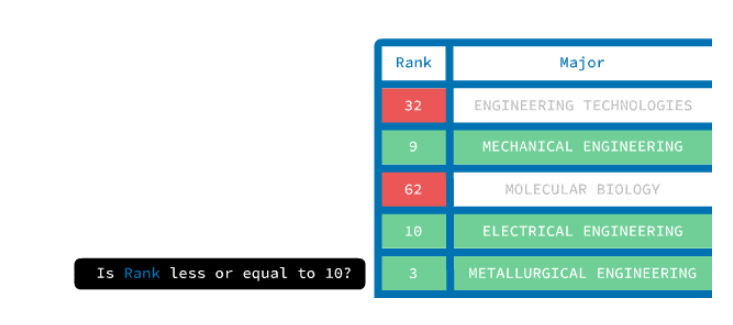

We can do this using the CASE clause in SQL. We'll program the following logic:

- If the row corresponds to a top 10 major, assign the value Top 10.
- If the row corresponds to a top 20 major that isn't a top 10 major, assign the value Top 20.
- Otherwise let it be a missing value.

We can do this using the following syntax:

In [3]:
%%sql

SELECT CASE
       WHEN rank <= 10 THEN 'Top 10'
       WHEN rank <= 20 THEN 'Top 20'
       ELSE NULL
       END AS rank_category
  FROM recent_grads
  LIMIT 15;

 * sqlite:///jobs.db
Done.


rank_category
Top 10
Top 10
Top 10
Top 10
Top 10
Top 10
Top 10
Top 10
Top 10
Top 10


A more general syntax looks like this:

```
CASE
WHEN <condition_1> THEN <value_1>
WHEN <condition_2> THEN <value_2>
ELSE <value_3>
END AS <new_column_name>
```

Let's look at a few rows of the result of the following query:

In [6]:
%%sql

SELECT Major, Rank,
       CASE
       WHEN rank <= 10 THEN 'Top 10'
       WHEN rank <= 20 THEN 'Top 20'
       ELSE NULL
       END AS rank_category
  FROM recent_grads
  LIMIT 12;

 * sqlite:///jobs.db
Done.


Major,Rank,rank_category
PETROLEUM ENGINEERING,1,Top 10
MINING AND MINERAL ENGINEERING,2,Top 10
METALLURGICAL ENGINEERING,3,Top 10
NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,Top 10
CHEMICAL ENGINEERING,5,Top 10
NUCLEAR ENGINEERING,6,Top 10
ACTUARIAL SCIENCE,7,Top 10
ASTRONOMY AND ASTROPHYSICS,8,Top 10
MECHANICAL ENGINEERING,9,Top 10
ELECTRICAL ENGINEERING,10,Top 10


We can see that we coded our logic correctly. We'll examine this clause on the next screen.

In this exercise we'll categorize the Sample_size column into three categories: Small, Medium, and Large.

The size of a sample is very important for statistical analysis. (You can learn more about this in the statistics courses.) Now let's practice!

*Write a SQL query that displays, with the alias Sample_category, the column with values that are a result of the following rules:*

- *Small if Sample_size is smaller than 200.*
- *Medium if Sample_size is equal to or higher than 200, and smaller than 1000.*
- *Large if Sample_size is equal to or higher than 1000.*

In [7]:
%%sql

SELECT Major, 
       Sample_size, 
       CASE
        WHEN Sample_size < 200 THEN "Small"
        WHEN Sample_size >= 200 AND Sample_size < 1000 THEN "Medium"
        ELSE "Large"
       END AS Sample_category
  FROM recent_grads
  LIMIT 10;

 * sqlite:///jobs.db
Done.


Major,Sample_size,Sample_category
PETROLEUM ENGINEERING,36,Small
MINING AND MINERAL ENGINEERING,7,Small
METALLURGICAL ENGINEERING,3,Small
NAVAL ARCHITECTURE AND MARINE ENGINEERING,16,Small
CHEMICAL ENGINEERING,289,Medium
NUCLEAR ENGINEERING,17,Small
ACTUARIAL SCIENCE,51,Small
ASTRONOMY AND ASTROPHYSICS,10,Small
MECHANICAL ENGINEERING,1029,Large
ELECTRICAL ENGINEERING,631,Medium


### Disecting CASE

Look again at the syntax we saw in the previous screen.

```
CASE
WHEN <condition_1> THEN <value_1>
WHEN <condition_2> THEN <value_2>
ELSE <value_3>
END AS <new_column_name>
```

Note the following:

- It starts with CASE to indicate that we'll be creating values by cases.
- It ends with END to indicate where the CASE clause terminates.
- The reserved word WHEN signals each explicit case.
- The value for each case follows the reserved word THEN
- There is a fallback value indicated by the reserved word ELSE.

Here are some important observations:

- Anything you can use in WHERE for filtering, you can also use in place of the conditions above.
- There can be one or more WHEN lines. We demonstrated this with three, but it works with any number.
- The ELSE line is optional — without it, rows that don't match any WHEN will get a missing value (NULL).

Let's practice some more with a very similar exercise.

*Write a SQL query that displays, in this order, Major, Sample_size, and a column named Sample_category with values defined by the following rules:*

- Small if Sample_size is smaller than 200.
- Medium if Sample_size is equal to or higher than 200, and smaller than 1000.
- Large if Sample_size is equal to or higher than 1000.

In [9]:
%%sql

SELECT Major, 
       Sample_size, 
       CASE 
        WHEN Sample_size < 200 THEN 'Small'
        WHEN Sample_size < 1000 THEN 'Medium'
        ELSE 'Large'
       END AS Sample_category
    FROM recent_grads
    LIMIT 10;

 * sqlite:///jobs.db
Done.


Major,Sample_size,Sample_category
PETROLEUM ENGINEERING,36,Small
MINING AND MINERAL ENGINEERING,7,Small
METALLURGICAL ENGINEERING,3,Small
NAVAL ARCHITECTURE AND MARINE ENGINEERING,16,Small
CHEMICAL ENGINEERING,289,Medium
NUCLEAR ENGINEERING,17,Small
ACTUARIAL SCIENCE,51,Small
ASTRONOMY AND ASTROPHYSICS,10,Small
MECHANICAL ENGINEERING,1029,Large
ELECTRICAL ENGINEERING,631,Medium


## Calculating group-level summary statistics

Let's return to calculating summary statistics by group. By group we mean any of the unique values in a column. Typically group statistics only calculate for columns in which the values represent categories (as opposed to measurements, like age, currency, and so on).

The GROUP BY SQL statement allows us to compute summary statistics by group. When we use this statement, SQL creates a group for each unique value in a column or set of columns (the same values we get when we use the DISTINCT statement), and then performs the calculations for them.

To demonstrate, we can find the total number of people employed in each major category with the following query:

In [16]:
%%sql 

SELECT SUM(Employed)
  FROM recent_grads 
 GROUP BY Major_category
 LIMIT 10;

 * sqlite:///jobs.db
Done.


SUM(Employed)
66943
288114
302797
1088742
330660
237894
479839
420372
372147
544118


This give us the total number of employed graduates for each major category.

The output shows aggregate counts of the Employed column for each Major_category. Unfortunately, it doesn't indicate which major category each row refers to. We can fix this by including the Major_category column in our query:

In [19]:
%%sql

SELECT Major_category, SUM(Employed) 
  FROM recent_grads 
 GROUP BY Major_category;

 * sqlite:///jobs.db
Done.


Major_category,SUM(Employed)
Agriculture & Natural Resources,66943
Arts,288114
Biology & Life Science,302797
Business,1088742
Communications & Journalism,330660
Computers & Mathematics,237894
Education,479839
Engineering,420372
Health,372147
Humanities & Liberal Arts,544118


We'll explore how this works. For now, let's jump right into practicing.

One of the questions we asked at beginning of the mission was ***What is the total number of graduates by major category?*** Let's answer it.

*Write a SQL query that, for each major category, displays the following:*

- *The major category*
- *The total number of graduates for Major_category with the alias Total_graduates*

In [20]:
%%sql

SELECT Major_category,
       SUM(Total) AS Total_graduates
    FROM recent_grads
    GROUP BY Major_category

 * sqlite:///jobs.db
Done.


Major_category,Total_graduates
Agriculture & Natural Resources,79981
Arts,357130
Biology & Life Science,453862
Business,1302376
Communications & Journalism,392601
Computers & Mathematics,299008
Education,559129
Engineering,537583
Health,463230
Humanities & Liberal Arts,713468


## GROUP BY Visual breakdown

Here's how the previous query works.

The `GROUP BY` statement divides the Major_category column into groups (one group for each unique major category), then calculates the sum for each group. The following diagram shows how GROUP BY divides the data (the diagram uses a small sample from the recent_grads table):

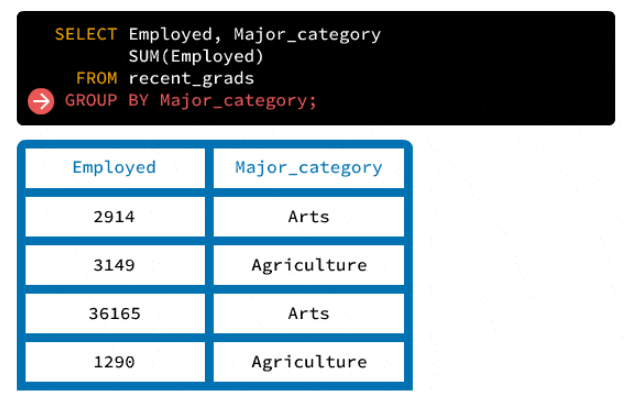

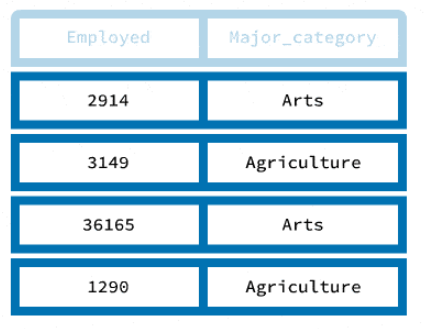

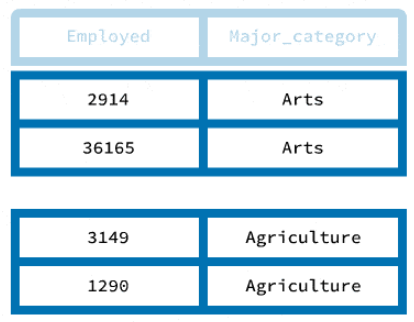

For each group, the GROUP BY statement queries each column and runs all of the aggregation functions we include in the query after the SELECT statement:

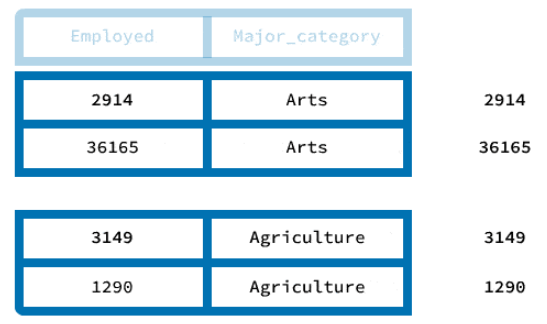

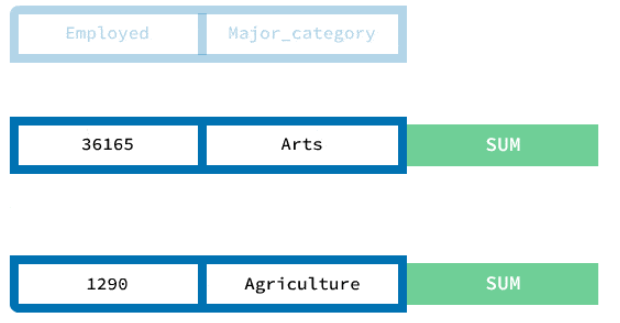

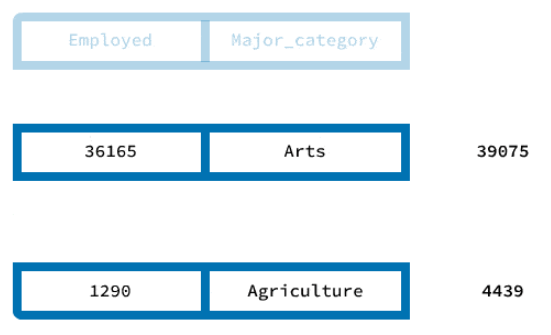

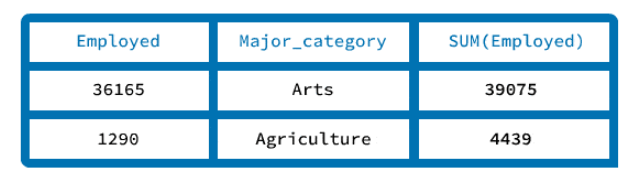

The SQL engine will use the **last value for a selected column in the group**. The SQL engine will also **compute the value for a selected aggregation function across the group**.

Now let's try using a different aggregate function.

*Write a SQL query that, for each major category, displays the following:*

- *The major category*
- *The average share of women with the alias Average_women.*

In [25]:
%%sql

SELECT Major_category,
       AVG(ShareWomen) AS Average_women
    FROM recent_grads
    GROUP BY  Major_category

 * sqlite:///jobs.db
Done.


Major_category,Average_women
Agriculture & Natural Resources,0.6179384232
Arts,0.56185119575
Biology & Life Science,0.584518475857143
Business,0.4050631853076923
Communications & Journalism,0.64383484025
Computers & Mathematics,0.5127519954545455
Education,0.6749855163125
Engineering,0.2571578951034483
Health,0.6168565694166667
Humanities & Liberal Arts,0.6761934042


## Multiple summary statistics by group

In addition to computing multiple summary statistics for the whole table, as we did in the "Summary Statistics" mission, we can also compute multiple summary statistics by groups.

Working from the same example, here's a query that for each major category finds the following:

- The total number of employed graduates
- The average number of employed graduates
- The maximum number of employed graduates in a major
- The minimum number of employed graduates in a major

In [26]:
%%sql

SELECT Major_category,
       SUM(Employed), AVG(Employed), MAX(Employed), MIN(Employed)
  FROM recent_grads
 GROUP BY Major_category;

 * sqlite:///jobs.db
Done.


Major_category,SUM(Employed),AVG(Employed),MAX(Employed),MIN(Employed)
Agriculture & Natural Resources,66943,6694.3,17112,613
Arts,288114,36014.25,83483,2914
Biology & Life Science,302797,21628.35714285714,182295,1010
Business,1088742,83749.38461538461,276234,2912
Communications & Journalism,330660,82665.0,179633,44679
Computers & Mathematics,237894,21626.727272727272,102087,559
Education,479839,29989.9375,149339,703
Engineering,420372,14495.586206896553,76442,604
Health,372147,31012.25,180903,7052
Humanities & Liberal Arts,544118,36274.53333333333,149180,2787


We can also perform calculations using the resulting columns, much like we did before. Here's a query that computes the difference between the maximum and the minimum number of employed graduates:

In [27]:
%%sql 

SELECT Major_category,
       SUM(Employed), AVG(Employed), MAX(Employed) - MIN(Employed) as range_employed
  FROM recent_grads
 GROUP BY Major_category;


 * sqlite:///jobs.db
Done.


Major_category,SUM(Employed),AVG(Employed),range_employed
Agriculture & Natural Resources,66943,6694.3,16499
Arts,288114,36014.25,80569
Biology & Life Science,302797,21628.35714285714,181285
Business,1088742,83749.38461538461,273322
Communications & Journalism,330660,82665.0,134954
Computers & Mathematics,237894,21626.727272727272,101528
Education,479839,29989.9375,148636
Engineering,420372,14495.586206896553,75838
Health,372147,31012.25,173851
Humanities & Liberal Arts,544118,36274.53333333333,146393


Note that we used an alias for the result without any problems. You can use aliases the same way you did before.

Now that we have a better understanding of the GROUP BY statement, let's practice using it by computing summary statistics by group for the recent_grads table. 

*Write a query that, for each major category, displays the following in this order:*
- *The major category*
- *The total number of women with the alias Total_women*
- *The average proportion of women with the alias Mean_women*
- *The result of multiplying the total number of graduates by the average proportion of women with the alias Estimate_women.*

In [33]:
%%sql

SELECT Major_category, 
       SUM(Women) AS Total_women,
       AVG(ShareWomen) AS Mean_women,
       Total * AVG(ShareWomen) AS Estimate_women
    FROM recent_grads
    GROUP BY Major_category

 * sqlite:///jobs.db
Done.


Major_category,Total_women,Mean_women,Estimate_women
Agriculture & Natural Resources,249812,0.6179384232,2694.8294635752
Arts,140469,0.56185119575,1876.582993805
Biology & Life Science,578132,0.584518475857143,1029.921554460286
Business,110367,0.4050631853076923,1529.9236509071538
Communications & Journalism,98278,0.64383484025,137778.08047413902
Computers & Mathematics,62599,0.5127519954545455,65795.82330473182
Education,612958,0.6749855163125,552.138152343625
Engineering,118051,0.2571578951034483,601.4923166469655
Health,312026,0.6168565694166667,129166.0644964335
Humanities & Liberal Arts,349636,0.6761934042,2081.9994915318


## Multiple group columns

So far we've only grouped by one column (Major_category), but it's also possible to group by multiple columns.

Let's demonstrate this with the following table called fruit. This table isn't in the database that we're using here, so you won't be able to experiment with it.

![img](img/fruits.png)

We see that we have the groups in color and in sourness.

We've ran queries like the one below, which yields the mean weight and price:

```
SELECT color,
       AVG(weight),
       AVG(price)
  FROM fruit
 GROUP BY color;
```

![img](img/result.png)

If we want the mean weight and price for the group of sweet red fruits, or more generally, the mean weight and price for all the combinations of groups of color and sourness, we can use GROUP BY. Here's an example:


```
SELECT color, sourness,
       AVG(weight), AVG(price), MIN(weight), MIN(price)
  FROM fruit
 GROUP BY color, sourness;
```

![img](img/result2.png)


We can easily confirm the minimum values by spot-checking.


Earlier we created a column with values determined by the following rules:

- Small if Sample_size is smaller than 200
- Medium if Sample_size is equal to or higher than 200 and smaller than 1000
- Large if Sample_size is equal to or higher than 1000

We duplicated the recent_grads table and added that column to a new table. It's called new_grads, and we'll use it for the remainder of this mission.


*Write a query that, for each combination of Major_category and Sample_category, displays the following in this order:*

- The major category
- The sample category
- The average proportion of women with the alias Mean_women
- The sum total of graduates with the alias Total_graduates

In [38]:
%%sql 

SELECT Major_category,
       CASE 
        WHEN Sample_size < 200 THEN 'Small'
        WHEN Sample_size < 1000 THEN 'Medium'
        ELSE 'Large'
       END AS Sample_category,
       AVG(ShareWomen) AS Mean_women,
       SUM(Total) AS Total_graduates
FROM recent_grads
GROUP BY Major_category, Sample_category
LIMIT 10;

 * sqlite:///jobs.db
Done.


Major_category,Sample_category,Mean_women,Total_graduates
Agriculture & Natural Resources,Medium,0.75257011,35813
Agriculture & Natural Resources,Small,0.5842805015,44168
Arts,Large,0.37435562299999997,103480
Arts,Medium,0.6070284135,217083
Arts,Small,0.5641134296666667,36567
Biology & Life Science,Large,0.601858152,280709
Biology & Life Science,Medium,0.584556133,25965
Biology & Life Science,Small,0.5830703647500001,147188
Business,Large,0.39816511960000006,1142867
Business,Medium,0.4335738126,130698


### Querying virtual columns with the HAVING statement

Sometimes we want to select a subset of rows after performing a GROUP BY query. On the last screen, for instance, we may have wanted to select only those rows where Mean_women is greater than .8.

We **can't use** the WHERE clause to do this:

``` 
SELECT Major_category, Sample_category,
       AVG(ShareWomen) AS Mean_women,
       SUM(Total) AS Total_graduates
  FROM new_grads
 GROUP BY Major_category, Sample_category
 WHERE Mean_women > 0.8;
 
 **** Error ****
```

We got an error! We'll understand why WHERE doesn't work here in the next screen. For now, let's learn how we would be able to subset the data.

When we want to filter on a column generated by a GROUP BY query, we can use the HAVING statement. Here's an example:

```
SELECT Major_category, Sample_category,
       AVG(ShareWomen) AS Mean_women,
       SUM(Total) AS Total_graduates
  FROM new_grads
 GROUP BY Major_category, Sample_category
HAVING Mean_women > 0.8;
``` 

In [39]:
%%sql 

SELECT Major_category,
       CASE 
        WHEN Sample_size < 200 THEN 'Small'
        WHEN Sample_size < 1000 THEN 'Medium'
        ELSE 'Large'
       END AS Sample_category,
       AVG(ShareWomen) AS Mean_women,
       SUM(Total) AS Total_graduates
FROM recent_grads
GROUP BY Major_category, Sample_category
HAVING Mean_women > 0.8
LIMIT 10;

 * sqlite:///jobs.db
Done.


Major_category,Sample_category,Mean_women,Total_graduates
Education,Large,0.923745479,170862
Health,Large,0.896018988,209394
Psychology & Social Work,Medium,0.810704147,53552


*Find all of the major categories where the share of graduates with low-wage jobs is greater than .1.*
- *Use the SELECT statement to select Major_category and AVG(Low_wage_jobs) / AVG(Total) as Share_low_wage*
- *Use the GROUP BY statement to group the query by the Major_category column.*
- *Use the HAVING statement to restrict the selection to rows where Share_low_wage is greater than .1.*

In [40]:
%%sql

SELECT Major_category,
       AVG(Low_wage_jobs) / AVG(Total) AS Share_low_wage
    FROM recent_grads
    GROUP BY Major_category
    HAVING Share_low_wage > 0.1

 * sqlite:///jobs.db
Done.


Major_category,Share_low_wage
Arts,0.16833085991095678
Communications & Journalism,0.1263241815481876
Humanities & Liberal Arts,0.13208721344194835
Industrial Arts & Consumer Services,0.11571334076033978
Law & Public Policy,0.11568503743572278
Psychology & Social Work,0.11693384919554187
Social Science,0.10223297343603174


## Order of execution

In the "Summary Statistics" mission, we learned that when executing a SQL query, the computer runs the clauses in this order:

1. FROM
2. WHERE
3. SELECT
4. ORDER BY
5. LIMIT

Now we know two more clauses: GROUP BY and HAVING. We can expand our mental model of the general structure of a query:

```
SELECT column(s)
  FROM some_table
 WHERE some_condition
 GROUP BY column(s)
HAVING some_condition
 ORDER BY column(s)
 LIMIT some_limit;
```

And the order in which SQL runs this is as follows:

1. FROM
2. WHERE
3. GROUP BY
4. HAVING
5. SELECT
6. ORDER BY
7. LIMIT

We still haven't looked at using GROUP BY and ORDER BY simultaneously — we'll see an example later.

Note, however, that ORDER BY executes after GROUP BY. One of the main goals of ordering results is functional output, so it makes sense that it should be one of the last clauses to run.

### Rounding results with the ROUND() function


On a previous screen, the percentages in our results were very long and hard to read (e.g., 0.16833085991095678). We can use the SQL ROUND function in our query to round them. Here's an example of what this looks like:

In [49]:
%%sql

SELECT Major_category,
       ROUND(ShareWomen, 2) AS rounded_share_women 
  FROM recent_grads
  LIMIT 5;

 * sqlite:///jobs.db
Done.


Major_category,rounded_share_women
Engineering,0.12
Engineering,0.1
Engineering,0.15
Engineering,0.11
Engineering,0.34


The query will round the ShareWomen column to two decimal places.

By passing different values into the ROUND function, such as ROUND(ShareWomen, 3), we can round to different decimal places.

*Write a query with the following features that displays the first 10 results in this order:*

- *ShareWomen rounded to 4 decimal places with the alias Rounded_women*
- *Major_category*

In [50]:
%%sql

SELECT ROUND(ShareWomen, 4) AS Rounded_women,
       Major_category
FROM recent_grads
LIMIT 5;

 * sqlite:///jobs.db
Done.


Rounded_women,Major_category
0.1206,Engineering
0.1019,Engineering
0.153,Engineering
0.1073,Engineering
0.3416,Engineering


## Nesting functions

On an earlier screen, we ran the following query:

```
SELECT Major_category, Sample_category,
       AVG(ShareWomen) AS Mean_women,
       SUM(Total) AS Total_graduates
  FROM new_grads
 GROUP BY Major_category, Sample_category
HAVING Mean_women > 0.8;
```

This query returned very long fractional values for Mean_women. We can update our query with the ROUND function to round the results to three decimal places:


```
SELECT Major_category, Sample_category,
       ROUND(AVG(ShareWomen), 3) AS Mean_women,
       SUM(Total) AS Total_graduates
  FROM new_grads
 GROUP BY Major_category, Sample_category
HAVING Mean_women > 0.8;
```` 

*Write a query that does the following:*
- *Aggregates by the major's category*
- *Displays the following in order:*
    - *The major's category*
    - *The ratio AVG(College_jobs) / AVG(Total) rounded to three decimal places with the alias Share_degree_jobs*
- *Only keeps the rows where Share_degree_jobs is less than .3*

In [51]:
%%sql

SELECT Major_category,
       ROUND(AVG(College_jobs) / AVG(Total), 3) AS Share_degree_jobs
    FROM recent_grads
    GROUP BY Major_category
    HAVING Share_degree_jobs < 0.3


 * sqlite:///jobs.db
Done.


Major_category,Share_degree_jobs
Agriculture & Natural Resources,0.248
Arts,0.265
Business,0.114
Communications & Journalism,0.22
Humanities & Liberal Arts,0.27
Industrial Arts & Consumer Services,0.249
Law & Public Policy,0.163
Social Science,0.215


## Casting

On the last few screens, we used SQL arithmetic to divide float (what we referred to as decimal numbers in an earlier mission) columns. This resulted in float values that we could round using the ROUND() function.

If we try to divide two integer columns (Women and Total, for instance), SQLite (and most other SQL dialects) will round down and return integer values:

In [55]:
%%sql 

SELECT Women, Total,
       Women/Total SW
  FROM recent_grads
 LIMIT 12;

 * sqlite:///jobs.db
Done.


Women,Total,SW
282,2339,0
77,756,0
131,856,0
135,1258,0
11021,32260,0
373,2573,0
960,3777,0
1667,1792,0
2105,91227,0
6548,81527,0


Notice how every time Women is smaller than Total the result 0 and when Women is larger, the result is 1. The query rounded the ratio.

To get float value, we can use the **CAST() function** to the transform the columns into Float type:

In [59]:
%%sql

SELECT CAST(Women AS Float) / CAST(Total AS Float) AS women_ratio
  FROM recent_grads 
 LIMIT 5;

 * sqlite:///jobs.db
Done.


women_ratio
0.12056434373663959
0.10185185185185185
0.1530373831775701
0.10731319554848967
0.3416305021698698


*Write a query that does the following:*
- *Divides the sum of the Women column by the sum of the Total column, aliased as SW and as float values.*
- *Groups the results by Major_category and orders by SW.*
- *Only contains the Major_category and SW columns, in that order.*

In [66]:
%%sql

SELECT  Major_category,
        CAST(SUM(Women) AS FLOAT) / SUM(Total) AS SW
    FROM recent_grads
    GROUP BY Major_category
    ORDER BY SW
    LIMIT 5

 * sqlite:///jobs.db
Done.


Major_category,SW
Law & Public Policy,0.030585069260274586
Business,0.08474280852841269
Industrial Arts & Consumer Services,0.16024926890405236
Computers & Mathematics,0.20935560252568494
Engineering,0.2195958577559186
